<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468027 entries, 0 to 16468026
Data columns (total 25 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   timestamp              int64  
 1   uid                    int64  
 2   campaign               int64  
 3   conversion             int64  
 4   conversion_timestamp   int64  
 5   conversion_id          int64  
 6   attribution            int64  
 7   click                  int64  
 8   click_pos              int64  
 9   click_nb               int64  
 10  cost                   float64
 11  cpo                    float64
 12  time_since_last_click  int64  
 13  cat1                   int64  
 14  cat2                   int64  
 15  cat3                   int64  
 16  cat4                   int64  
 17  cat5                   int64  
 18  cat6                   int64  
 19  cat7                   int64  
 20  cat8                   int64  
 21  cat9                   int64  
 22  day             

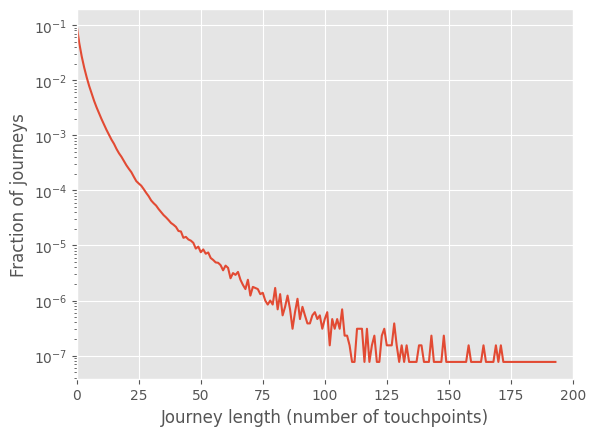

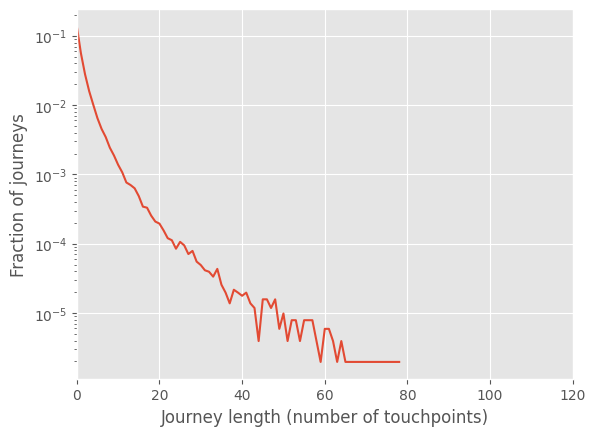

675
9
70
1829
21
51
30
57196
11
30


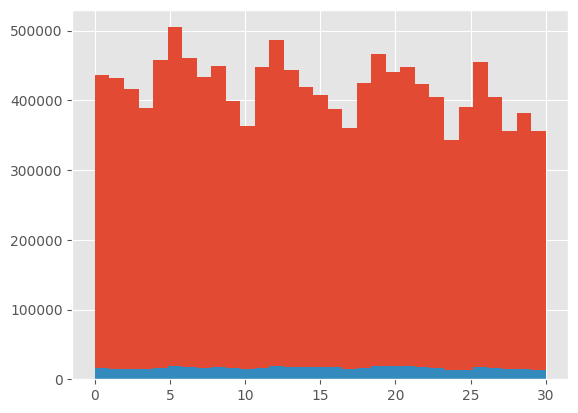

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

#Load Criteo dataset

path_raw_data = r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\01 Data\raw data thesis.tsv"
df_Criteo_Attribution = pd.read_csv(path_raw_data, sep='\t')

df_Criteo_Attribution['day'] = np.floor(df_Criteo_Attribution.timestamp / 86400.).astype(int)
df_Criteo_Attribution['conversion_day'] = np.floor(df_Criteo_Attribution.conversion_timestamp / 86400.).astype(int)
df_Criteo_Attribution['jid'] = df_Criteo_Attribution['uid'].map(str) + '_' + df_Criteo_Attribution['conversion_id'].map(str)

df_Criteo_Attribution.shape #Check shape
df_Criteo_Attribution.describe() #Check descriptions
df_Criteo_Attribution.info() #Check variables

df_Criteo_Attribution['gap_click_sale'] = -1
df_Criteo_Attribution.loc[df_Criteo_Attribution.conversion == 1, 'gap_click_sale'] = df_Criteo_Attribution.conversion_day - df_Criteo_Attribution.day

# min touchpoints = 2
grouped = df_Criteo_Attribution.groupby(['jid'])['uid'].count().reset_index(name="count")
df_Criteo_Attribution = df_Criteo_Attribution[df_Criteo_Attribution['jid'].isin( grouped[grouped['count'] >= 2]['jid'].values )]
df_Criteo_Attribution.groupby(['jid'])['uid'].count().reset_index(name="count").groupby(['count']).count()


#Plot journey length for all journeys 
def journey_length_histogram(df):
    counts = df.groupby(['jid'])['uid'].count().reset_index(name="count").groupby(['count']).count()
    return counts.index, counts.values / df.shape[0]

hist_x, hist_y = journey_length_histogram(df_Criteo_Attribution)

plt.plot(range(len(hist_x)), hist_y, label='all journeys')
plt.yscale('log')
plt.xlim(0, 200)
plt.xlabel('Journey length (number of touchpoints)')
plt.ylabel('Fraction of journeys')
plt.show()


#Plot journey length of converted journeys
def journey_length_hist(df):
    counts = df.groupby(['jid'])['uid'].count().reset_index(name="count").groupby(['count']).count()
    return counts.index, counts.values / df.shape[0]

hist_x, hist_y = journey_length_hist(df_Criteo_Attribution[df_Criteo_Attribution.conversion==1])

plt.plot(range(len(hist_x)), hist_y, label='all journeys')
plt.yscale('log')
plt.xlim(0, 120)
plt.xlabel('Journey length (number of touchpoints)')
plt.ylabel('Fraction of journeys')
plt.show()


#Events on each day
df_Criteo_Attribution.day.hist(bins=len(df_Criteo_Attribution.day.unique()))

#Conversions on each day
df_Criteo_Attribution[df_Criteo_Attribution.conversion==1].day.hist(bins=len(df_Criteo_Attribution.day.unique()))

#Conversions per campaign
df_Criteo_Conversion = df_Criteo_Attribution[df_Criteo_Attribution.conversion==1]
df_Criteo_Conversion.groupby(['campaign'])['jid'].nunique().reset_index(name="count")

#Campaign wise User Count
df_Criteo_Attribution.groupby(['campaign'])['uid'].nunique().reset_index(name="User count")


#Count categorical variables
path_raw_data = r"C:\Users\pim\OneDrive\Documents\Studie\Master BA & QM\Thesis\01 Data\raw data thesis.tsv"
df_Criteo_Attribution_raw = pd.read_csv(path_raw_data, sep='\t')

campaign = df_Criteo_Attribution_raw['campaign']
cat1 = df_Criteo_Attribution_raw['cat1']
cat2 = df_Criteo_Attribution_raw['cat2']
cat3 = df_Criteo_Attribution_raw['cat3']
cat4 = df_Criteo_Attribution_raw['cat4']
cat5 = df_Criteo_Attribution_raw['cat5']
cat6 = df_Criteo_Attribution_raw['cat6']
cat7 = df_Criteo_Attribution_raw['cat7']
cat8 = df_Criteo_Attribution_raw['cat8']
cat9 = df_Criteo_Attribution_raw['cat9']

unique_campagin = campaign.nunique()
unique_cat1 = cat1.nunique()
unique_cat2 = cat2.nunique()
unique_cat3 = cat3.nunique()
unique_cat4 = cat4.nunique()
unique_cat5 = cat5.nunique()
unique_cat6 = cat6.nunique()
unique_cat7 = cat7.nunique()
unique_cat8 = cat8.nunique()
unique_cat9 = cat9.nunique()

print(unique_campagin)
print(unique_cat1)
print(unique_cat2)
print(unique_cat3)
print(unique_cat4)
print(unique_cat5)
print(unique_cat6)
print(unique_cat7)
print(unique_cat8)
print(unique_cat9)